In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=sns.load_dataset("tips")

In [13]:
dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
dataset.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
cat_var=dataset.select_dtypes(include=["category"])

In [11]:
cat_var.columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [31]:
dummy_cols=pd.get_dummies(cat_var.drop(columns=["day"],axis=1),drop_first=True)
dummy_cols.columns

Index(['sex_Female', 'smoker_No', 'time_Dinner'], dtype='object')

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
ohe=OneHotEncoder(sparse=False,drop="first")
dataset=ohe.fit_transform(cat_var[['sex','smoker','time']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
arr

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [60]:
dataset[['sex','smoker','time']]=pd.DataFrame(arr,columns=['sex_Female', 'smoker_No', 'time_Dinner'])

In [61]:
dataset.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0.0,0.0,2,0.0,2
1,10.34,1.66,1.0,0.0,2,0.0,3
2,21.01,3.50,1.0,0.0,2,0.0,3
3,23.68,3.31,1.0,0.0,2,0.0,2
4,24.59,3.61,0.0,0.0,2,0.0,4


In [48]:
## encoding the day column using label encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
dataset["day"]=le.fit_transform(dataset["day"])

In [62]:
dataset.head(8)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0.0,0.0,2,0.0,2
1,10.34,1.66,1.0,0.0,2,0.0,3
2,21.01,3.50,1.0,0.0,2,0.0,3
3,23.68,3.31,1.0,0.0,2,0.0,2
4,24.59,3.61,0.0,0.0,2,0.0,4
5,25.29,4.71,1.0,0.0,2,0.0,4
6,8.77,2.00,1.0,0.0,2,0.0,2
7,26.88,3.12,1.0,0.0,2,0.0,4


In [63]:
dataset.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


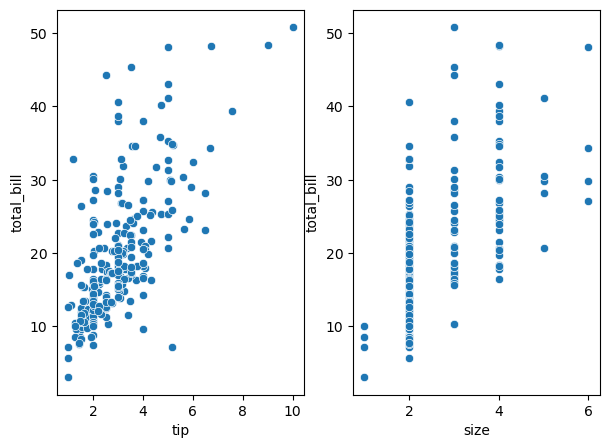

In [78]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
sns.scatterplot(x='tip',y='total_bill',data=dataset)
plt.subplot(1,2,2)
sns.scatterplot(x='size',y='total_bill',data=dataset)
plt.show()

In [80]:
#removing outliers

<Axes: xlabel='tip'>

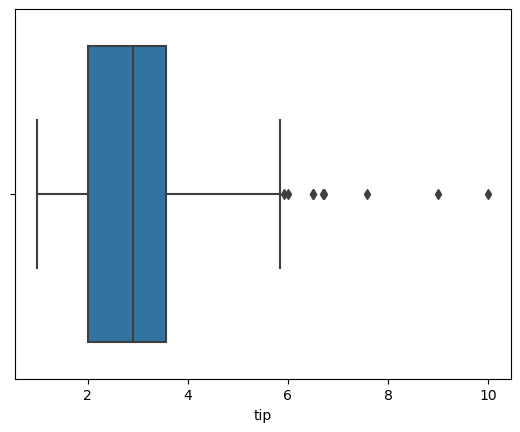

In [81]:
sns.boxplot(data=dataset,x='tip')

In [83]:
q1=dataset['tip'].quantile(0.25)
q3=dataset['tip'].quantile(0.75)
IQR=q3-q1

In [84]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range , max_range

(-0.34375, 5.90625)

In [85]:
new_dataset=dataset[dataset["tip"] <= max_range]

In [86]:
new_dataset.describe()

,total_bill,tip,sex,smoker,day,time,size
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,19.122851,2.836809,0.634043,0.382979,1.753191,0.285106,2.519149
std,8.176492,1.100406,0.482726,0.487151,0.932979,0.452429,0.916757
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.215000,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.460000,2.740000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,23.215000,3.500000,1.000000,1.000000,3.000000,1.000000,3.000000
max,48.170000,5.850000,1.000000,1.000000,3.000000,1.000000,6.000000


<Axes: xlabel='tip'>

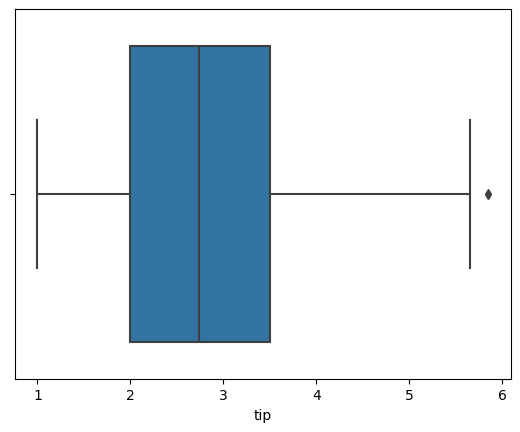

In [90]:
sns.boxplot(data=new_dataset,x='tip')

In [97]:
 new_dataset[['size', 'tip', 'total_bill']].corr()

,size,tip,total_bill
size,1.000000,0.450306,0.581462
tip,0.450306,1.000000,0.595065
total_bill,0.581462,0.595065,1.000000


In [98]:
## standardize

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
mmsc=MinMaxScaler()
new_dataset[['size','tip']]=mmsc.fit_transform(new_dataset[['size','tip']])

C:\Users\Asus\AppData\Local\Temp\ipykernel_2720\4065578713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[['size','tip']]=mmsc.fit_transform(new_dataset[['size','tip']])


In [108]:
new_dataset.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,0.002062,0.0,0.0,2,0.0,0.2
1,10.34,0.136082,1.0,0.0,2,0.0,0.4


In [109]:
new_dataset.describe().round(2)

,total_bill,tip,sex,smoker,day,time,size
count,235.00,235.00,235.00,235.00,235.00,235.00,235.00
mean,19.12,0.38,0.63,0.38,1.75,0.29,0.30
std,8.18,0.23,0.48,0.49,0.93,0.45,0.18
min,3.07,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.22,0.21,0.00,0.00,1.00,0.00,0.20
50%,17.46,0.36,1.00,0.00,2.00,0.00,0.20
75%,23.22,0.52,1.00,1.00,3.00,1.00,0.40
max,48.17,1.00,1.00,1.00,3.00,1.00,1.00


In [111]:
new_dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x=new_dataset.drop(columns=["total_bill"],axis=1)
y=new_dataset["total_bill"]

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression

In [117]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [121]:
lr.predict(x_test)

array([18.96371053, 13.52292451, 24.55364722, 17.83397639, 12.06462957,
       23.90262698, 15.38270179, 21.50787904, 23.47062504, 19.67424226,
       12.5251875 , 11.73991784, 14.12150053, 23.30229217, 27.48564561,
       14.55350247, 21.55426578, 17.6887992 , 19.45560448, 22.87556385,
       15.45502652, 13.78005739, 18.84082706, 12.67805152, 18.27027702,
       13.93872505, 16.06520753, 26.75245443, 18.7322595 , 21.70381977,
       15.88702845, 17.02858718, 22.55465839, 36.59411251, 12.53287433,
       20.36375761, 14.88312101, 16.82311466, 26.58412156, 25.41892845,
       22.51575995, 20.80357307, 12.53287433, 29.51260511, 22.67819628,
       24.20949316, 29.01747022])

In [122]:
y_test

72     26.86
215    12.90
186    20.90
9      14.78
130    19.08
112    38.07
202    13.00
96     27.28
231    15.69
15     21.58
233    10.77
57     26.41
236    12.60
31     18.35
207    38.73
151    13.13
19     20.65
115    17.31
234    15.53
25     17.81
217    11.59
10     10.27
98     21.01
148     9.78
229    22.12
26     13.37
89     21.16
189    23.10
87     18.28
18     16.97
150    14.07
69     15.01
46     22.23
143    27.05
128    11.38
175    32.90
168    10.59
16     10.33
160    21.50
182    45.35
165    24.52
210    30.06
127    14.52
63     18.29
205    16.47
238    35.83
85     34.83
Name: total_bill, dtype: float64

In [118]:
lr.score(x_test,y_test)

0.36110527012376525